In [3]:
## For this, we do not need specialisied environment, we will use numpy, scipy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [4]:
#Universal constants

w = 0.4128

In [5]:
##let us define the functions to use. We will use a large 

def integrand(x, t, tb):
    return np.sin(x*t)/(1 + (x**2)*(tb**2))


def s(t,tk):
    tb = w*np.pi*tk
    I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]
    return I

In [14]:
print(s(0,0.08))

0.0


In [6]:
# gamma_imp =    # depends on v_F somehow, have to find that relation
#tk = 3*gamma_imp/(w*(np.pi**2))

def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-0.5*np.pi*np.sin(theta)/theta_k)

In [8]:
theta_list = [np.pi/3,np.pi/4]
thetak_list = [np.pi/4,np.pi/6]

for theta in theta_list:
    for thetak in thetak_list:
        tk = tk_col(theta,thetak)
        print("Kondo temperature for theta = ",round(theta,2)," and theta_k = ",round(thetak,2)," is ",round(tk,2))

Kondo temperature for theta =  1.05  and theta_k =  0.79  is  0.19
Kondo temperature for theta =  1.05  and theta_k =  0.52  is  0.08
Kondo temperature for theta =  0.79  and theta_k =  0.79  is  0.27
Kondo temperature for theta =  0.79  and theta_k =  0.52  is  0.13


In [9]:
def c_eq(t,tb,tk):
    return -2*(0.25*np.exp(-2*t/tb) - s(t,tk)**2)

In [10]:
def correlator(tw,t,tb,tk):
    val = c_eq(t,tb,tk) - 2*np.exp(-tw/tb)*s(t,tk)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk)) - np.exp(-2*tw/tb)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk))**2
    return val

In [11]:
def plot_sz(tw,theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            tk = tk_col(theta,thetak)
            tb = w*np.pi*tk
            for t in t_list:
                val_list.append(2*correlator(tw,t,tb,tk))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("magnetization")
            plt.legend()
            plt.show()

            


/var/folders/ys/hsq5k3zs70b8y915g7tk_yx00000gn/T/ipykernel_16929/3823508897.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]
/var/folders/ys/hsq5k3zs70b8y915g7tk_yx00000gn/T/ipykernel_16929/3823508897.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]


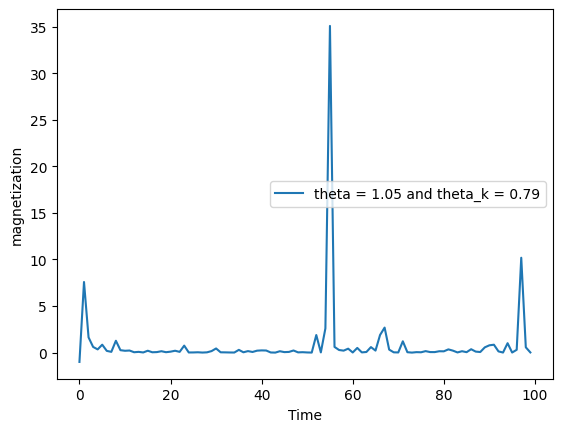

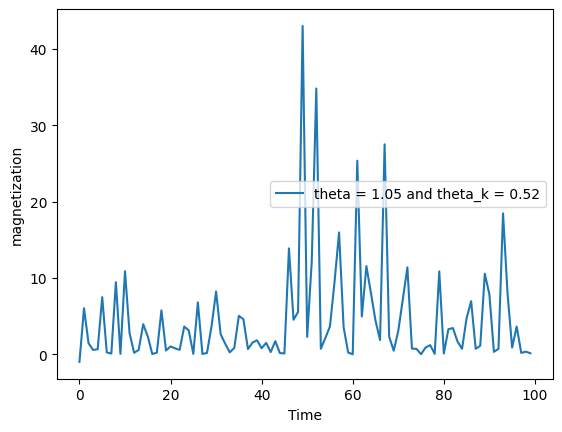

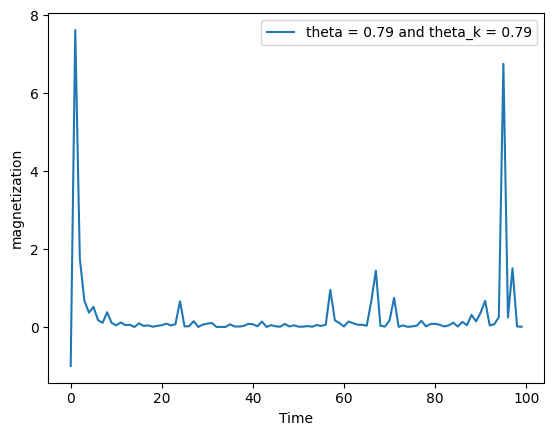

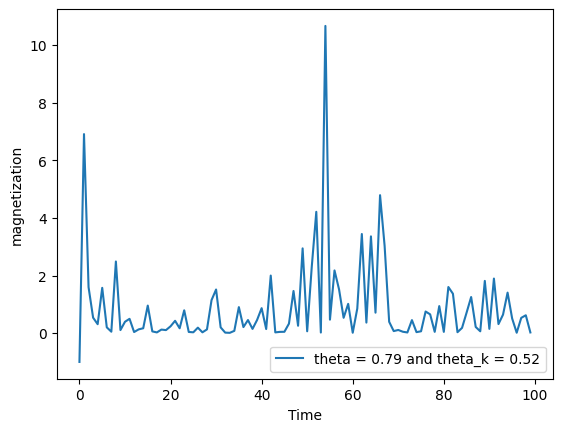

In [12]:
plot_sz(0,theta_list,thetak_list)